In [2]:
using Revise
#using Random, Distributions
using CSV
using DataFrames
using StatsBase
using CairoMakie

include("../src/SpectralStatistics.jl")
import .SpectralStatistics as stats

In [3]:
folder = pwd() * "/data"
filename = "/kspectrum.csv"
#names = [Symbol("e"), Symbol("ten")]
df = DataFrame(CSV.File(folder * filename, header=0) )
k = df.Column1 #.^ 2

kspect = stats.RealSpectrum(k) 
spectrum = stats.unfold_spectrum(kspect,2)

Main.SpectralStatistics.UnfoldedSpectrum([1.094064267882677, 1.9746928522493443, 2.8803207188577105, 3.939476363247939, 5.092025065238052, 6.35734280150668, 6.924048402791022, 7.809608655310654, 9.288028581047824, 9.719471628384252  …  2.005970756175629e6, 2.0059711700619769e6, 2.0059716062732574e6, 2.00597423929405e6, 2.0059757933053342e6, 2.0059768705632407e6, 2.0059773683687563e6, 2.0059779242460164e6, 2.005979190869107e6, 2.0059806919083202e6])

In [4]:
folder = pwd() * "/data"
filename = "/unfolded_spectrum2.csv"
#names = [Symbol("e"), Symbol("ten")]
df = DataFrame(CSV.File(folder * filename, header=0) )
e = df.Column1

spectrum = stats.UnfoldedSpectrum(e) #unfolded spectrum Type


Main.SpectralStatistics.UnfoldedSpectrum([0.020088869907476454, 1.0494204378135181, 2.3443588189274003, 2.7007302715690384, 4.225299772199284, 4.954697313138514, 6.4385422292229695, 6.891930954946573, 7.798894957336686, 9.13404935933204  …  2.0010886788305254e6, 2.0010892571556424e6, 2.0010897350300865e6, 2.0010909726256414e6, 2.001091881786611e6, 2.0010930896167953e6, 2.0010942810629837e6, 2.0010952298994954e6, 2.0010957879009813e6, 2.0010970790590371e6])

In [5]:
brody = stats.Brody()
br = stats.BerryRobnik()
brb = stats.BerryRobnikBrody()


Main.SpectralStatistics.BerryRobnikBrody()

In [6]:
beta = 0.5
rho = 0.5
min_s = 0.0
max_s = 5.0
grid = 200

var = collect(LinRange(min_s, max_s, grid))
#statistic = "level_spacing_pdf"
n = 1 #order of level spacing n= 1 means nearest neighbour
#x, res = stats.level_spacing_pdf(spectrum, var; n=n)
model_brody = stats.level_spacing_pdf(brody, var; beta);
model_br = stats.level_spacing_pdf(br, var; rho);
model_brb = stats.level_spacing_pdf(brb, var; rho, beta);

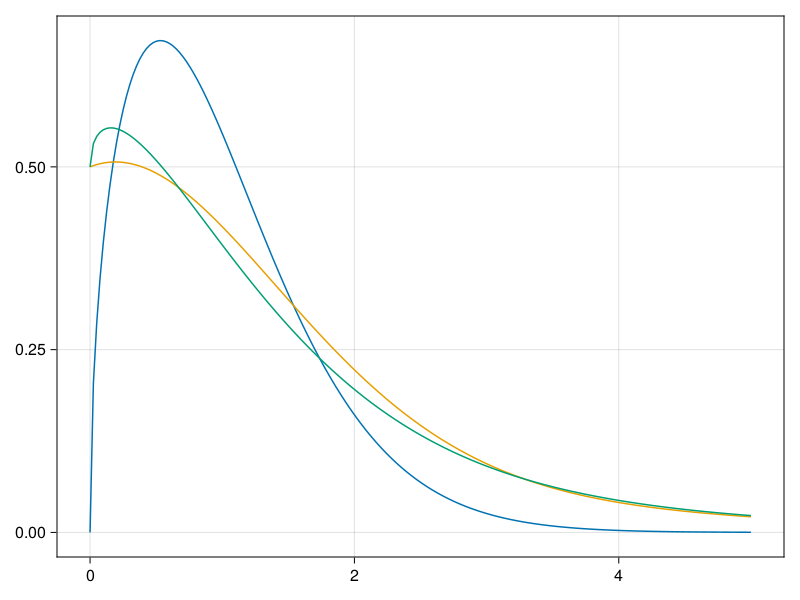

In [7]:
f, ax, l1 = lines(var, model_brody)
l2 = lines!(ax, var, model_br)
l3 = lines!(ax, var, model_brb)
f

In [8]:
beta = 0.5
rho = 0.2
min_s = 0.0
max_s = 10.0
grid = 200

var = collect(LinRange(min_s, max_s, grid))
#statistic = "level_spacing_pdf"
n = 1 #order of level spacing n= 1 means nearest neighbour
#x, res = stats.level_spacing_pdf(spectrum, var; n=n)
model_brody = stats.level_spacing_cdf(brody, var; beta);
model_br = stats.level_spacing_cdf(br, var; rho);
model_brb = stats.level_spacing_cdf(brb, var; rho, beta);

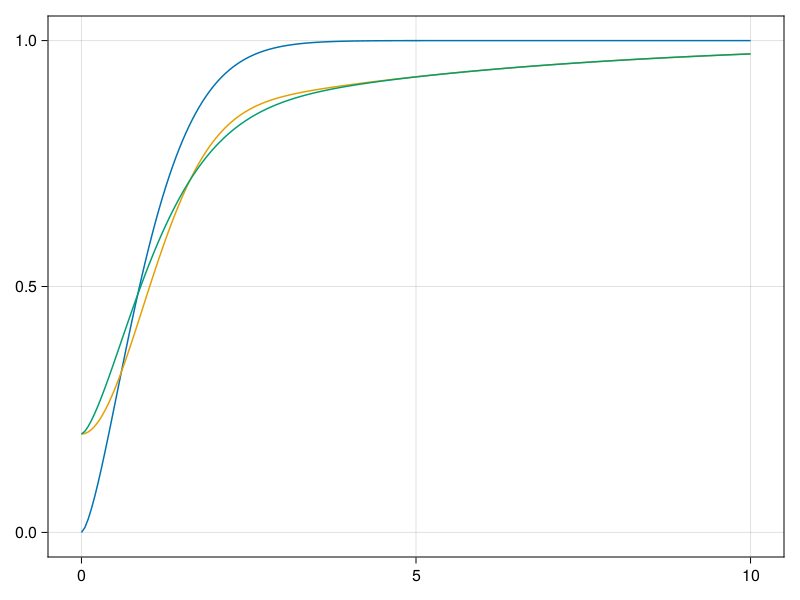

In [9]:
f, ax, l1 = lines(var, model_brody)
l2 = lines!(ax, var, model_br)
l3 = lines!(ax, var, model_brb)
f

In [10]:
beta = 0.5
rho = 0.2
min_s = 0.0
max_s = 10.0
grid = 200

var = collect(LinRange(min_s, max_s, grid))
#statistic = "level_spacing_pdf"
n = 1 #order of level spacing n= 1 means nearest neighbour
#x, res = stats.level_spacing_pdf(spectrum, var; n=n)
model_brody = stats.level_spacing_u(brody, var; beta);
model_br = stats.level_spacing_u(br, var; rho);
model_brb = stats.level_spacing_u(brb, var; rho, beta);

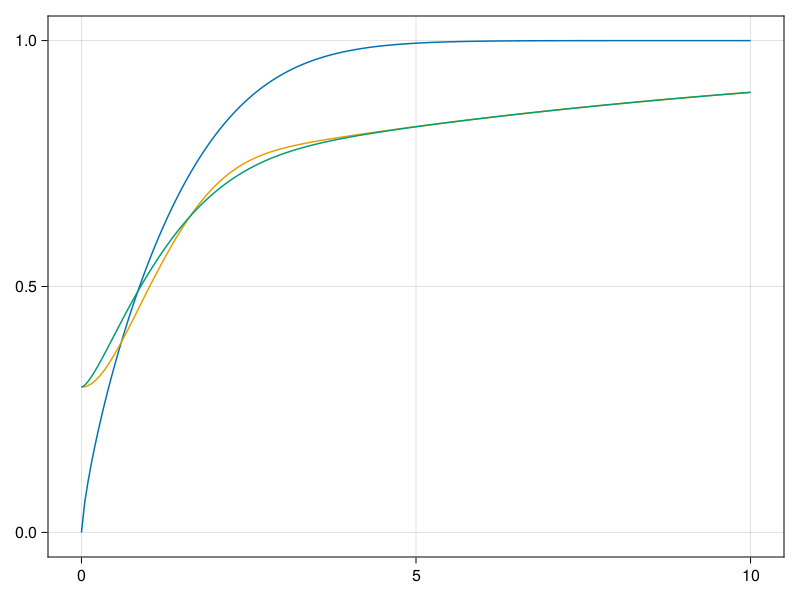

In [11]:
f, ax, l1 = lines(var, model_brody)
l2 = lines!(ax, var, model_br)
l3 = lines!(ax, var, model_brb)
f

In [12]:
min_s = 0.0
max_s = 10.0
grid = 200

var = collect(LinRange(min_s, max_s, grid))

model = stats.BerryRobnikBrody()
statistic = stats.level_spacing_pdf
param = stats.fit_model(spectrum, model, statistic, var)

x, y = statistic(spectrum, var)
model_brody = statistic(model, var; param...);

In [13]:
param

Dict{Symbol, Float64} with 2 entries:
  :beta => 0.728553
  :rho  => -0.0406465

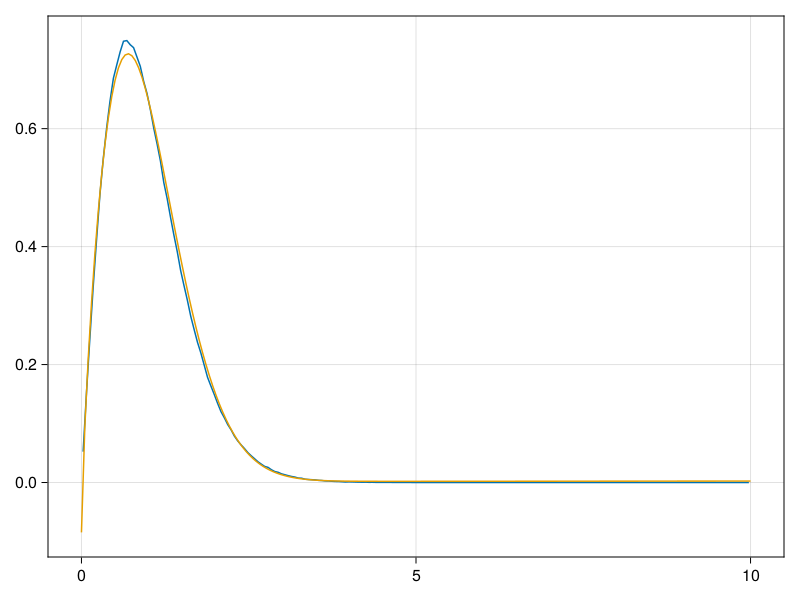

In [14]:
f, ax, l1 = lines(x, y)
l2 = lines!(ax, var, model_brody)
f